In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from warnings import filterwarnings
filterwarnings('ignore')

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


In [6]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

## Assets Usages Rate

In [7]:
assets_distinct = usage["Asset"].unique()
assets_usages_steps = []

for asset in tqdm(assets_distinct):
    asset_rows = usage.query("Asset == @asset")
    
    asset_times = asset_rows["Time"].values
    asset_uses = asset_rows["Use"].values
    
    asset_infos = list(zip(asset_times, asset_uses))
    
    asset_usages_steps = []
    for info1, info2 in list(zip(asset_infos[:-1], asset_infos[1:])):
        if info2[0] > info1[0]:
            usage_step = (info2[1] - info1[1]) / (info2[0] - info1[0])
            asset_usages_steps.append(usage_step)
    assets_usages_steps.append(asset_usages_steps)
            
usage_rate_df = pd.DataFrame({'Asset': assets_distinct,
                              'Usages_steps': assets_usages_steps,
                              'Usages_steps_mean': list(map(lambda x: np.mean(x), assets_usages_steps)),
                              'Usages_steps_std': list(map(lambda x: np.std(x), assets_usages_steps)),
                              'Usages_steps_size': list(map(lambda x: len(x), assets_usages_steps))})

usage_rate_df.dropna(inplace=True)
usage_rate_df.set_index('Asset', inplace=True)

100%|██████████| 1894/1894 [00:03<00:00, 505.90it/s]


In [8]:
usage_rate_df.head(10)

,Usages_steps,Usages_steps_mean,Usages_steps_std,Usages_steps_size
Asset,,,,
A403193,"[2.4070266849706363, 3.5684591413550013, 4.981...",2.824856,0.973603,19
A617958,"[2.214310991851763, 1.8168741368648293, 2.6125...",1.845432,0.743210,11
A531932,"[1.7867965964091412, 0.8752824308982742, 2.625...",1.971835,0.993793,27
A242376,"[2.3340864823912852, 3.041690286685187, 2.6540...",2.806774,0.418182,7
A650572,"[2.2924063666370267, 3.2093689132941465, 2.293...",2.423082,0.730168,9
A180615,"[2.555422269519552, 1.652048224552747, 2.69878...",2.305763,0.442741,11
A603228,"[1.5617784551320844, 2.3091941910407905]",1.935486,0.373708,2
A988606,"[2.866120901177055, 2.6258472926965624, 2.0214...",2.628592,0.905919,7
A183204,"[2.4350199519046596, 3.07168403652358, 0.02917...",2.253614,1.131473,5


## Assets Failures Rate

In [9]:
assets_distinct = failures["Asset"].unique()
assets_failures_steps = []

for asset in tqdm(assets_distinct):
    asset_rows = failures.query("Asset == @asset")
    
    asset_times = asset_rows["Time"].values
    
    asset_failure_steps = []
    for time1, time2 in zip(asset_times[:-1], asset_times[1:]):
        asset_failure_steps.append(time2 - time1)
    
    assets_failures_steps.append(asset_failure_steps)
            
failure_rate_df = pd.DataFrame({'Asset': assets_distinct,
                              'Failures_steps': assets_failures_steps,
                              'Failures_steps_mean': list(map(lambda x: np.mean(x), assets_failures_steps)),
                              'Failures_steps_std': list(map(lambda x: np.std(x), assets_failures_steps)),
                              'Failures_steps_size': list(map(lambda x: len(x), assets_failures_steps))})

failure_rate_df.dropna(inplace=True)
failure_rate_df.set_index('Asset', inplace=True)

100%|██████████| 1819/1819 [00:02<00:00, 609.81it/s]


In [10]:
failure_rate_df.head(10)

,Failures_steps,Failures_steps_mean,Failures_steps_std,Failures_steps_size
Asset,,,,
A403193,"[9, 9, 74, 191, 124, 108]",85.833333,64.491386,6
A617958,"[431, 47, 116]",198.000000,167.146642,3
A531932,"[167, 36, 17, 16, 6, 30, 115, 41, 81, 86, 6, 29]",52.500000,47.724033,12
A242376,"[69, 107, 130]",102.000000,25.152866,3
A650572,"[137, 175, 119, 130]",140.250000,21.063891,4
A180615,"[56, 39, 37, 62, 61]",51.000000,10.825895,5
A603228,"[87, 174, 356]",205.666667,112.078346,3
A988606,"[95, 74]",84.500000,10.500000,2
A183204,"[172, 99]",135.500000,36.500000,2


## Dataframes join by Assets

In [11]:
asset_failure_usage_rate = usage_rate_df.join(failure_rate_df)
asset_failure_usage_rate.head(10)

,Usages_steps,Usages_steps_mean,Usages_steps_std,Usages_steps_size,Failures_steps,Failures_steps_mean,Failures_steps_std,Failures_steps_size
Asset,,,,,,,,
A403193,"[2.4070266849706363, 3.5684591413550013, 4.981...",2.824856,0.973603,19,"[9, 9, 74, 191, 124, 108]",85.833333,64.491386,6.0
A617958,"[2.214310991851763, 1.8168741368648293, 2.6125...",1.845432,0.743210,11,"[431, 47, 116]",198.000000,167.146642,3.0
A531932,"[1.7867965964091412, 0.8752824308982742, 2.625...",1.971835,0.993793,27,"[167, 36, 17, 16, 6, 30, 115, 41, 81, 86, 6, 29]",52.500000,47.724033,12.0
A242376,"[2.3340864823912852, 3.041690286685187, 2.6540...",2.806774,0.418182,7,"[69, 107, 130]",102.000000,25.152866,3.0
A650572,"[2.2924063666370267, 3.2093689132941465, 2.293...",2.423082,0.730168,9,"[137, 175, 119, 130]",140.250000,21.063891,4.0
A180615,"[2.555422269519552, 1.652048224552747, 2.69878...",2.305763,0.442741,11,"[56, 39, 37, 62, 61]",51.000000,10.825895,5.0
A603228,"[1.5617784551320844, 2.3091941910407905]",1.935486,0.373708,2,"[87, 174, 356]",205.666667,112.078346,3.0
A988606,"[2.866120901177055, 2.6258472926965624, 2.0214...",2.628592,0.905919,7,"[95, 74]",84.500000,10.500000,2.0
A183204,"[2.4350199519046596, 3.07168403652358, 0.02917...",2.253614,1.131473,5,"[172, 99]",135.500000,36.500000,2.0


## Plots

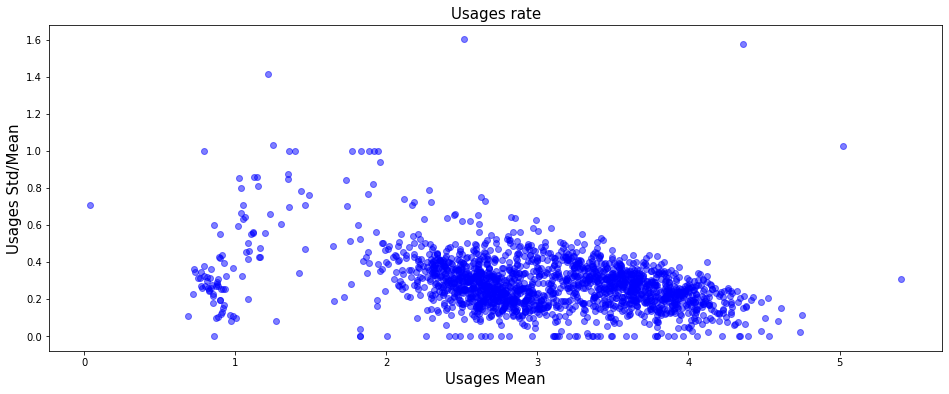

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(asset_failure_usage_rate["Usages_steps_mean"],
         asset_failure_usage_rate["Usages_steps_std"] / asset_failure_usage_rate["Usages_steps_mean"],
         "bo", alpha=0.5)
plt.title("Usages rate", fontsize=15)
plt.xlabel("Usages Mean", fontsize=15)
plt.ylabel("Usages Std/Mean", fontsize=15)
plt.show()

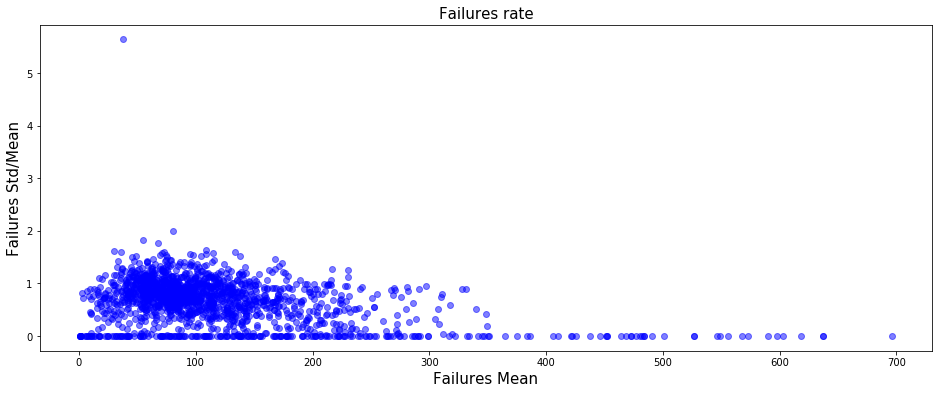

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(asset_failure_usage_rate["Failures_steps_mean"],
         asset_failure_usage_rate["Failures_steps_std"] / asset_failure_usage_rate["Failures_steps_mean"],
         "bo", alpha=0.5)
plt.title("Failures rate", fontsize=15)
plt.xlabel("Failures Mean", fontsize=15)
plt.ylabel("Failures Std/Mean", fontsize=15)
plt.show()

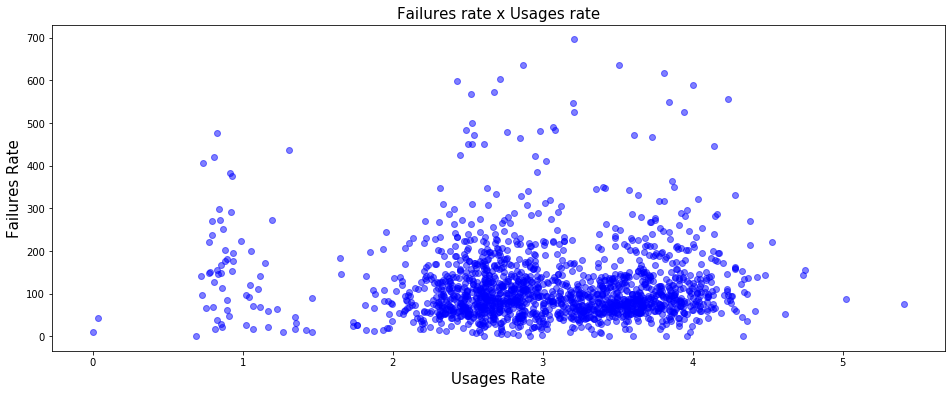

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(asset_failure_usage_rate["Usages_steps_mean"],
         asset_failure_usage_rate["Failures_steps_mean"],
         "bo", alpha=0.5)
plt.title("Failures rate x Usages rate", fontsize=15)
plt.xlabel("Usages Rate", fontsize=15)
plt.ylabel("Failures Rate", fontsize=15)
plt.show()